# Homework 1-5

---

## Imports

In [1]:
from thermostate import State, Q_, units

---

## Definitions

In [2]:
substance = 'water'
p_6 = Q_(5000.0, 'kPa')
p_2 = Q_(1200.0, 'kPa')
x_2 = Q_(96.0, 'percent')
p_4 = Q_(20.0, 'kPa')
x_4 = Q_(96.0, 'percent')

---

## Problem Statement

Consider a steam power plant that operates on the ideal reheat Rankine cycle. The plant maintains the boiler at 5000.0 kPa, the reheat section at 1200.0 kPa, and the condenser at 20.0 kPa. The mixture quality at the exit of both turbines is 96.0  percent. Determine:

1. The temperature at the inlet of each turbine, in °C
2. The cycle's thermal efficiency

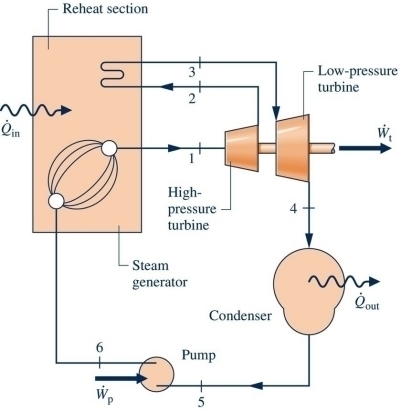

---

## Solution

### 1. The temperature at the inlet of each turbine

To find the temperature at the inlet of each turbine, we need to find two independent and intensive properties each at state 1 and state 3. To do so, we will use the fact that two independent, intensive properties are specified at state 2 and state 4, and that since this is an *ideal* Rankine cycle, the turbines are isentropic to find the properties at state 1 and state 3. Assuming that the steam generator/reheater operates at constant pressure, $p_1 = p_6$ and $p_2 = p_3$, then

In [4]:
# Finding T_1
st_2 = State(substance, p=p_2, x=x_2)
s_2 = st_2.s
s_1 = s_2
p_1 = p_6
st_1 = State(substance, p=p_1, s=s_1)
T_1 = st_1.T.to('degC')

# Finding T_3
st_4 = State(substance, p=p_4, x=x_4)
s_4 = st_4.s
s_3 = s_4
p_3 = p_2
st_3 = State(substance, p=p_3, s=s_3)
T_3 = st_3.T.to('degC')

<div class="alert alert-success">

**Answer:** The temperature at the inlet of the high pressure turbine is $T_1 =$ 327.20 celsius and the temperature at the inlet of the low pressure turbine is $T_3 =$ 481.11 celsius.

</div>

### 2. The cycle's thermal efficiency

To find the thermal efficiency, we must find the heat transfer input and the net power output from the cycle. To do this, we need to fix state 5 and state 6 using two independent and intensive properties at each state. At state 5, because this is an ideal Rankine cycle, we know that the pressure is equal to $p_4$ and that the quality is zero. Furthermore, we know that the process through the pump is isentropic. Therefore

In [5]:
p_5 = p_4
x_5 = Q_(0.0, 'dimensionless')
st_5 = State(substance, p=p_5, x=x_5)
s_5 = st_5.s
s_6 = s_5
st_6 = State(substance, p=p_6, s=s_6)

Now, the heat transfer input and the net power output can be found by

\begin{align}
\frac{\dot{Q}_{in}}{\dot{m}} &= h_1 - h_6 + h_3 - h_2\\
\frac{\dot{W}_{net}}{\dot{m}} &= h_1 - h_2 + h_3 - h_4 + h_5 - h_6
\end{align}

In [6]:
h_1 = st_1.h
h_2 = st_2.h
h_3 = st_3.h
h_4 = st_4.h
h_5 = st_5.h
h_6 = st_6.h

Qdot_in = h_1 - h_6 + h_3 - h_2
Wdot_net = h_1 - h_2 + h_3 - h_4 + h_5 - h_6

eta = Wdot_net/Qdot_in

<div class="alert alert-success">

**Answer:** The thermal efficiency of the cycle is $\eta =$ 0.35  = 35.00 %

</div>